# **<u>A Machine Learning Approach to Predicting Box Office Revenue</u>**

 
## **<u>Abstract</u>**

The goal of the project is to predict global box office revenue based on a film's attributes. Through machine learning, the model will identify the amount of influence that each factor has towards a film's success. A film's attributes include budget, duration, cast and age certificate. Predicting something as specific as global box office revenue when so many factors, both quantifiable and not, have an effect is extremely complex. Thus, it is fair to accept a reasonable margin of error with the model's predictions.

## **<u>Learning Objectives</u>**

By following this tutorial, you should:

- Learn how to develop a machine learning model to predict a film's box office revenue
- Develop an understanding of how different factors affect a film's success in the box office
- Learn how to process and analyse data for use in a machine learning model, using techniques such as data cleaning and feature engineering
- Understand the use of different Python libraries for data handling and presentation
- Understand limitations of the dataset and how these limitations can affect results
- Understand how exploring and analysing results can lead to real-world insights and conclusions

## **<u>Table of Contents</u>**

1. [Data Collection and Preprocessing](#1.-Data-Collection-and-Preprocessing) <br>
   1.1 [Finding the Dataset](#1.1-Finding-the-Dataset) <br>
   1.2 [Examining the Dataset](#1.2-Examining-the-Dataset) <br>
   1.3 [Preprocessing](#1.3-Preprocessing) <br>
   1.4 [Feature Engineering](#1.4-Feature-Engineering) <br>
2. [Training Process](#2.-Training-Process)
3. [Results](#3.-Results)
4. [Analysis of Similar Online Tutorials](#4.-Analysis-of-Similar-Online-Tutorials)
5. [References](#5.-References)
   

## **<u>1. Data Collection and Preprocessing</u>**

The first step of any machine learning process is gathering data. In this case, we want to make use of an expansive dataset that covers as many attributes as possible that could influence revenue. With so many potential features, it is important that the dataset has a very large sample size, which will allow the model to notice and learn from patterns more easily, and will avoid overfitting to a niche, unrepresentative set of films.

### **1.1 Finding the Dataset**

When looking for a suitable dataset, there were some key features that would lead the search and selection. Firstly, the number of films needed to be high. A high sample size is more likely to be representative of the entire population than a small sample size. We also needed to make sure that the films included covered a wide range of release years and that each year was covered roughly the same amount as the others. This way, it would ensure that there was no bias towards any time period and would helpfully demonstrate how the industry has evolved over a significant amount of time. It would also help to reduce the effect of anomalies such as 2020 and 2021, when cinema attendance was greatly reduced due to Covid-19. In addition, it was important to examine the film attributes included, making sure that they covered all or, at least, most of the factors which may influence box office revenue. It was decided that some attributes were essential to the model, such as budget, age certificate, primary language, duration and, of course, global box office revenue, which would be the value predicted and tested against. 

The dataset selected was found on Kaggle (Addala, 2025). It contains 33,600 films, which are the most popular 500-600 films from each year since 1960 according to IMDb, from which the data was extracted. The dataset has a very large sample size, covers the last 65 years with a fairly even distribution and contains all of the essential attributes for this project, along with several more relevant and useful features. It also contains some interesting data to examine in comparison with box office success such as number of Oscar nominations and wins. This dataset was selected over the other options mostly due to the significant number of films (a lot of other datasets had only 2000-4000 films) and the wide variety of useful attributes.

One feature that was missing from this dataset that would have been a useful inclusion is release month, or a different categorical representation of it. There is evidence that films are generally more successful around holidays, so that is an unfortunate thing to miss by using this dataset. Another useful feature missing was the length of the theatrical run. It is logical that films that spend longer in cinemas will generally earn more money than those which are only in cinemas for a short time.

### **1.2 Examining the Dataset**

Before we do anything, let's import everything we will need.

In [919]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from torch.utils.data import TensorDataset, DataLoader

First, let's have a look at the columns of the dataset.

In [920]:
df = pd.read_csv("final_dataset.csv")
print(df.columns.tolist())

['id', 'Title', 'Movie Link', 'Year', 'Duration', 'MPA', 'Rating', 'Votes', 'budget', 'grossWorldWide', 'gross_US_Canada', 'opening_weekend_Gross', 'directors', 'writers', 'stars', 'genres', 'countries_origin', 'filming_locations', 'production_companies', 'Languages', 'wins', 'nominations', 'oscars']


Let's clarify any columns that are not entirely obvious. 

- Movie Link provides the IMDb link to the film, which is not useful to this dataset
- MPA refers to the Motion Picture Association, who are responsible for assigning age certificates to films. MPA is the age certificate given to the film in USA and this seems a fair choice given that USA typically has the biggest influence on the box office
- Rating refers to the IMDb rating of the film
- Votes refers to the number of IMDb users who have given a rating to the film
- Wins refers to the total number of award wins the film has received
- Nominations refers to the total number of award nominations the film has received
- Oscars refers to the total number of Oscar wins the film has received

Now we ask ourselves if any of these columns serve no purpose in the model and could therefore be dropped. Everything seems beneficial except 'id' and 'Movie Link' as they do not provide any useful information for the machine learning model. Therefore, we can drop these columns from the dataset.

In [921]:
df = df.drop(["id", "Movie Link"], axis = "columns")
print(df.columns.tolist())

['Title', 'Year', 'Duration', 'MPA', 'Rating', 'Votes', 'budget', 'grossWorldWide', 'gross_US_Canada', 'opening_weekend_Gross', 'directors', 'writers', 'stars', 'genres', 'countries_origin', 'filming_locations', 'production_companies', 'Languages', 'wins', 'nominations', 'oscars']


Now that any unnecessary columns have been removed, we have another look at the column names and see very inconsistent formatting- some start with lower case, some with upper case, some use underscores, some use Camel Case. Let's choose one format and change the ones that don't apply. In this case, lower case with underscores is chosen. Now let's change the names.

In [922]:
df = df.rename(columns={"Title": "title", "Year": "year", "Duration": "duration", "MPA": "mpa", "Rating": "rating", "Votes": "votes", "grossWorldWide": "gross_worldwide", "gross_US_Canada": "gross_us_canada", "opening_weekend_Gross": "opening_weekend_gross", "Languages": "languages"})
print(df.columns.tolist())

['title', 'year', 'duration', 'mpa', 'rating', 'votes', 'budget', 'gross_worldwide', 'gross_us_canada', 'opening_weekend_gross', 'directors', 'writers', 'stars', 'genres', 'countries_origin', 'filming_locations', 'production_companies', 'languages', 'wins', 'nominations', 'oscars']


In [923]:
df

,title,year,duration,mpa,rating,votes,budget,gross_worldwide,gross_us_canada,opening_weekend_gross,...,writers,stars,genres,countries_origin,filming_locations,production_companies,languages,wins,nominations,oscars
0,Jaws,1975,2h 4m,PG,8.1,683K,7000000.0,477220580.0,266567580.0,7061513.0,...,"['Peter Benchley', 'Carl Gottlieb']","['Roy Scheider', 'Robert Shaw', 'Richard Dreyf...","['Monster Horror', 'Sea Adventure', 'Survival'...",['United States'],"[""Water Street, Edgartown, Martha's Vineyard, ...","['Zanuck/Brown Productions', 'Universal Pictur...",['English'],0,20,0
1,The Rocky Horror Picture Show,1975,1h 40m,R,7.4,173K,1200000.0,115798478.0,112892319.0,NaN,...,"[""Richard O'Brien"", 'Jim Sharman']","['Tim Curry', 'Susan Sarandon', 'Barry Bostwick']","['Dark Comedy', 'Raunchy Comedy', 'Rock Musica...","['United Kingdom', 'United States']","['Oakley Court, Windsor Road, Oakley Green, Wi...","['Twentieth Century Fox', 'Michael White Produ...",['English'],0,4,0
2,One Flew Over the Cuckoo's Nest,1975,2h 13m,R,8.7,1.1M,3000000.0,109115366.0,108981275.0,NaN,...,"['Lawrence Hauben', 'Bo Goldman', 'Ken Kesey']","['Jack Nicholson', 'Louise Fletcher', 'Michael...","['Medical Drama', 'Psychological Drama', 'Drama']",['United States'],['Oregon State Mental Hospital - 2600 Center S...,"['Fantasy Films', 'N.V. Zvaluw']",['English'],0,15,0
3,Dog Day Afternoon,1975,2h 5m,R,8.0,279K,1800000.0,50002721.0,50000000.0,NaN,...,"['Frank Pierson', 'P.F. Kluge', 'Thomas Moore']","['Al Pacino', 'John Cazale', 'Penelope Allen']","['Heist', 'True Crime', 'Biography', 'Crime', ...",['United States'],"['285 Prospect Park West, Brooklyn, New York C...","['Warner Bros.', 'Artists Entertainment Complex']",['English'],0,20,0
4,Shampoo,1975,1h 50m,R,6.4,15K,4000000.0,49407734.0,49407734.0,NaN,...,"['Robert Towne', 'Warren Beatty']","['Warren Beatty', 'Julie Christie', 'Goldie Ha...","['Satire', 'Comedy', 'Drama']",['United States'],"['2270 Bowmont Drive, Beverly Hills, Californi...","['Persky-Bright / Vista', 'Columbia Pictures',...",['English'],0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,The South,1988,2h 7m,R,7.3,1.1K,NaN,NaN,NaN,NaN,...,['Fernando E. Solanas'],"['Susú Pecoraro', 'Miguel Ángel Solá', 'Philip...",['Drama'],"['Argentina', 'France']","['Buenos Aires, Federal District, Argentina']","['Canal+', 'Cinesur (Envar El Kadri)', 'Produc...","['Spanish', 'French']",0,2,0
33596,El cabaretero y sus golfas,1988,1h 25m,NaN,4.9,12,NaN,NaN,NaN,NaN,...,['Raúl Marcelo'],"['Raúl Ramírez', 'Raúl Marcelo', 'Marcela Davi...",['Comedy'],['Mexico'],NaN,NaN,['Spanish'],0,0,0
33597,BraveStarr: The Legend,1988,1h 31m,PG,6.8,1.3K,NaN,NaN,NaN,NaN,...,"['Bob Forward', 'Steve Hayes']","['Charlie Adler', 'Susan Blu', 'Pat Fraley']","['Superhero', 'Action', 'Adventure', 'Animatio...",['United States'],NaN,['Filmation Associates'],['English'],0,0,0
33598,Fighting Madam 2,1988,1h 30m,NaN,6.3,337,NaN,NaN,NaN,NaN,...,"['William Hsu', 'Teresa Woo', 'Larry Dolgin']","['Alex Fong', 'Moon Lee', 'Elaine Lui']",['Action'],['Hong Kong'],"['Kuala Lumpur, Malaysia']",['Molesworth Limited'],"['Cantonese', 'Mandarin']",0,0,0


After looking over the data, a few revelations have appeared. Every single item in the 'wins' column is 0. Clearly, something went wrong with the data collection for the Kaggle dataset. We will have to remove this column. The 'nominations' column is quite inconsistent. A huge film like Jaws (1975) has 20 nominations whereas Barbie (2023) has 433. This is not to say that Barbie was not huge, but rather, it highlights the inconsistency in this column. There are clearly a lot more awards and nominations globally now than there were in the past and it doesn't seem fair to compare them in this way. Finally, the 'oscars' column has incorrect data. Just looking at the first 3 rows, Jaws won 3 Oscars but the dataset says 0. One Flew Over the Cuckoo's Nest won 5 Oscars but again, the dataset says 0. It is not possible to find correct figures for all of these films in a reasonable amount of time so this column will also have to be removed.

In [924]:
df = df.drop(["wins", "nominations", "oscars"], axis = "columns")

In addition, the filming locations seem to serve little purpose as they have varying levels of specificity, which makes everything quite uneven. Also, a lot of the data will ultimately be covered by 'countries_origin'. Therefore, we will drop this column as well.

In [925]:
df = df.drop("filming_locations", axis = "columns")
df.columns.tolist()

['title',
 'year',
 'duration',
 'mpa',
 'rating',
 'votes',
 'budget',
 'gross_worldwide',
 'gross_us_canada',
 'opening_weekend_gross',
 'directors',
 'writers',
 'stars',
 'genres',
 'countries_origin',
 'production_companies',
 'languages']

### **1.3 Preprocessing**

The next step is to clean the data, deal with any missing or incorrect values, and, in general, get the data ready to be used in the model. First, let's deal with any missing values. We should first count how many rows in the dataset contain one or more missing values.

In [926]:
df.isna().any(axis=1).sum()

25559

25889 out of 33600 rows contain one or more missing values. This is a very significant number so we need to attempt to deal with the missing values in ways other than dropping the row entirely. Let's see which columns contain missing values and how many. This will give us an idea of what needs to be dealt with and how it should be done. If a column with numerical data contains only a few missing values, it would generally be fair to use an average to fill in the gaps. However, if a column with numerical data contains a large number of missing values, we may need to find another way of representing the empty spaces.

In [927]:
df.isna().sum(axis=0)

title                        0
year                         0
duration                   221
mpa                       7976
rating                     138
votes                      138
budget                   21785
gross_worldwide          15378
gross_us_canada          16029
opening_weekend_gross    18077
directors                  359
writers                   1576
stars                      473
genres                     382
countries_origin           366
production_companies      1378
languages                  474
dtype: int64

The standout issue here is 15,378 missing values in gross_worldwide, which is, of course, the target variable. It doesn't seem right to try to estimate these values, especially when the directly related values in gross_us_canada and opening_weekend_gross have even higher numbers of missing values. Therefore, the best approach appears to be ignoring the rows that don't have a gross_worldwide figure. Once we have done this, we can examine the resulting missing value statistics.

In [928]:
df = df[df["gross_worldwide"].notna()]
df.isna().sum(axis=0)

title                       0
year                        0
duration                   31
mpa                      2084
rating                     46
votes                      46
budget                   8816
gross_worldwide             0
gross_us_canada          1239
opening_weekend_gross    2773
directors                  60
writers                   923
stars                     169
genres                     36
countries_origin           76
production_companies      380
languages                 121
dtype: int64

In [929]:
df.shape[0]

18222

So we have 18222 rows remaining. It's a significant drop from the initial 33,600 but it's still quite a good amount of data. It makes sense to drop any columns first so there is less data to manipulate later. All of the other columns can be filled with substitute values. 

It is notable that nearly half of the remaining dataset is missing its budget. Let's replace those missing values with -1.0 to represent that the data is missing. This means we don't dramatically reduce the amount of data.

In [930]:
df.loc[:,"budget"] = df["budget"].fillna(-1.0).copy()
df["budget"]

0        7000000.0
1        1200000.0
2        3000000.0
3        1800000.0
4        4000000.0
           ...    
33470         -1.0
33486         -1.0
33502         -1.0
33535         -1.0
33569         -1.0
Name: budget, Length: 18222, dtype: float64

In [931]:
df["budget"].isna().sum()

0

It makes sense to do the same with gross_us_canada and opening_weekend_gross as there is a substantial number of missing values for these columns and we don't want to risk introducing bias or misleading information by approximating the values.

In [932]:
df.loc[:,"gross_us_canada"] = df["gross_us_canada"].fillna(-1.0).copy()
df.loc[:,"opening_weekend_gross"] = df["opening_weekend_gross"].fillna(-1.0).copy()
df.isna().sum(axis=0)

title                       0
year                        0
duration                   31
mpa                      2084
rating                     46
votes                      46
budget                      0
gross_worldwide             0
gross_us_canada             0
opening_weekend_gross       0
directors                  60
writers                   923
stars                     169
genres                     36
countries_origin           76
production_companies      380
languages                 121
dtype: int64

The numerical columns with few missing values can be approximated using the median without introducing any bias. Here, duration, rating and votes fall into this category so let's approximate the missing values with the median of each column. Median was chosen bc it ignores the effects of outliers.

However, we must do some adjustment first. Duration values are stored as _h _m so we need to convert that to a numerical value first, which will be in minutes. Votes are stored as _K or _M representing thousand and million respectively.

In [933]:
df = df.copy()
df["duration_hours"] = df["duration"].str.extract(r"(\d+)h").astype(float).fillna(0) * 60
df["duration_minutes"] = df["duration"].str.extract(r"(\d+)m").astype(float).fillna(0)
df["duration"] = df["duration_hours"] + df["duration_minutes"]
df = df.drop(["duration_hours", "duration_minutes"], axis = "columns")
print(df["duration"])

0        124.0
1        100.0
2        133.0
3        125.0
4        110.0
         ...  
33470     99.0
33486     90.0
33502    128.0
33535    173.0
33569    131.0
Name: duration, Length: 18222, dtype: float64


In [934]:
df["votes"] = df["votes"].str.replace("K", "e3").str.replace("M", "e6").astype(float)
df["votes"]

0         683000.0
1         173000.0
2        1100000.0
3         279000.0
4          15000.0
           ...    
33470       1600.0
33486        514.0
33502       2300.0
33535        669.0
33569       1300.0
Name: votes, Length: 18222, dtype: float64

In [935]:
df["rating"]

0        8.1
1        7.4
2        8.7
3        8.0
4        6.4
        ... 
33470    7.2
33486    6.9
33502    7.1
33535    6.4
33569    7.0
Name: rating, Length: 18222, dtype: float64

In [936]:
df["duration"] = df["duration"].replace(0.0, df["duration"].median())
df["rating"] = df["rating"].fillna(df["rating"].median())
df["votes"] = df["votes"].fillna(df["votes"].median())
df.isna().sum(axis=0)

title                       0
year                        0
duration                    0
mpa                      2084
rating                      0
votes                       0
budget                      0
gross_worldwide             0
gross_us_canada             0
opening_weekend_gross       0
directors                  60
writers                   923
stars                     169
genres                     36
countries_origin           76
production_companies      380
languages                 121
dtype: int64

There are already some values in the 'mpa' column that reflect that the data was not available, represented by the phrase 'Not Rated'. Therefore, we will replace all missing mpa values with the same phrase.

In [937]:
df["mpa"].loc[df["mpa"] == "Not Rated"]

28       Not Rated
31       Not Rated
47       Not Rated
174      Not Rated
175      Not Rated
           ...    
33365    Not Rated
33430    Not Rated
33470    Not Rated
33502    Not Rated
33535    Not Rated
Name: mpa, Length: 2484, dtype: object

In [938]:
df["mpa"] = df["mpa"].fillna("Not Rated")
df["mpa"].isna().sum()

0

The remaining columns containing missing values are all string-based. To deal with any missing values, the most sensible solution is to replace them with 'Unknown' to avoid losing any data. Of course, there is no value that we can use to approximate values in these cases except mode, which might obscure patterns and produce disingenuous data. In addition, unknown data can be a pattern in itself as it is likely that more successful films will have more data available, while small films with low revenue would be less well known and more difficult to find data about.

In [939]:
df["directors"] = df["directors"].fillna("Unknown")
df["writers"] = df["writers"].fillna("Unknown")
df["stars"] = df["stars"].fillna("Unknown")
df["genres"] = df["genres"].fillna("Unknown")
df["countries_origin"] = df["countries_origin"].fillna("Unknown")
df["production_companies"] = df["production_companies"].fillna("Unknown")
df["languages"] = df["languages"].fillna("Unknown")
df.isna().sum(axis=0)

title                    0
year                     0
duration                 0
mpa                      0
rating                   0
votes                    0
budget                   0
gross_worldwide          0
gross_us_canada          0
opening_weekend_gross    0
directors                0
writers                  0
stars                    0
genres                   0
countries_origin         0
production_companies     0
languages                0
dtype: int64

Let's check the categories in the 'mpa' column. Because we are focusing on box office, only the current film ratings will be used, which are G, PG, PG-13, R and NC-17.

In [940]:
df["mpa"].unique().tolist()

['PG',
 'R',
 'G',
 'Not Rated',
 'TV-MA',
 'PG-13',
 'X',
 'Approved',
 'GP',
 'Unrated',
 'TV-14',
 'TV-PG',
 'TV-G',
 '18+',
 'TV-Y7',
 'NC-17',
 '16+',
 'M/PG',
 'M',
 'MA-17',
 '13+',
 'TV-Y7-FV',
 'TV-13']

There are lots of ratings here that are not the 5 film ratings so we need to change these into the closest available rating.

In [941]:
ratings = {"PG": "PG", "R": "R", "G": "G", "Not Rated": "Not Rated", "PG-13": "PG-13", "TV-MA": "R", "X": "NC-17", "Approved": "G", "GP": "PG", "Unrated": "Not Rated", "TV-14": "PG-13", "TV-PG": "PG", "TV-G": "G", "18+": "NC-17", "TV-Y7": "PG", "NC-17": "NC-17", "16+": "R", "M/PG": "PG", "M": "PG-13", "MA-17": "NC-17", "13+": "PG-13", "TV-Y7-FV": "PG", "TV-13": "PG-13"}
df["mpa"] = df["mpa"].map(ratings)
df["mpa"].unique().tolist()

['PG', 'R', 'G', 'Not Rated', 'PG-13', 'NC-17']

Now the 'mpa' column is organised into the correct categories ready for encoding.

Through a combination of ignoring rows with missing values, imputing with a placeholder and imputing by approximation, we have managed to eliminate all missing values from the dataset. The next step is tidying up some remaining formats, specifically the values that are stored in list form- the columns from directors to languages.

We want to change the formatting of the list values:
1. to improve readability
2. to make it easier to deal with later on

In [942]:
df.loc[:,"directors"] = df["directors"].str.strip("[]").str.replace(r"(^|[^a-zA-Z])['\"]|['\"]([^a-zA-Z]|$)", r"\1\2", regex=True).copy()
df.loc[:,"writers"] = df["writers"].str.strip("[]").str.replace(r"(^|[^a-zA-Z])['\"]|['\"]([^a-zA-Z]|$)", r"\1\2", regex=True).copy()
df.loc[:,"stars"] = df["stars"].str.strip("[]").str.replace(r"(^|[^a-zA-Z])['\"]|['\"]([^a-zA-Z]|$)", r"\1\2", regex=True).copy()
df.loc[:,"genres"] = df["genres"].str.strip("[]").str.replace(r"(^|[^a-zA-Z])['\"]|['\"]([^a-zA-Z]|$)", r"\1\2", regex=True).copy()
df.loc[:,"countries_origin"] = df["countries_origin"].str.strip("[]").str.replace(r"(^|[^a-zA-Z])['\"]|['\"]([^a-zA-Z]|$)", r"\1\2", regex=True).copy()
df.loc[:,"production_companies"] = df["production_companies"].str.strip("[]").str.replace(r"(^|[^a-zA-Z])['\"]|['\"]([^a-zA-Z]|$)", r"\1\2", regex=True).copy()
df.loc[:,"languages"] = df["languages"].str.strip("[]").str.replace(r"(^|[^a-zA-Z])['\"]|['\"]([^a-zA-Z]|$)", r"\1\2", regex=True).copy()
df

,title,year,duration,mpa,rating,votes,budget,gross_worldwide,gross_us_canada,opening_weekend_gross,directors,writers,stars,genres,countries_origin,production_companies,languages
0,Jaws,1975,124.0,PG,8.1,683000.0,7000000.0,477220580.0,266567580.0,7061513.0,Steven Spielberg,"Peter Benchley, Carl Gottlieb","Roy Scheider, Robert Shaw, Richard Dreyfuss","Monster Horror, Sea Adventure, Survival, Adven...",United States,"Zanuck/Brown Productions, Universal Pictures",English
1,The Rocky Horror Picture Show,1975,100.0,R,7.4,173000.0,1200000.0,115798478.0,112892319.0,-1.0,Jim Sharman,"Richard O'Brien, Jim Sharman","Tim Curry, Susan Sarandon, Barry Bostwick","Dark Comedy, Raunchy Comedy, Rock Musical, Sup...","United Kingdom, United States","Twentieth Century Fox, Michael White Productions",English
2,One Flew Over the Cuckoo's Nest,1975,133.0,R,8.7,1100000.0,3000000.0,109115366.0,108981275.0,-1.0,Milos Forman,"Lawrence Hauben, Bo Goldman, Ken Kesey","Jack Nicholson, Louise Fletcher, Michael Berryman","Medical Drama, Psychological Drama, Drama",United States,"Fantasy Films, N.V. Zvaluw",English
3,Dog Day Afternoon,1975,125.0,R,8.0,279000.0,1800000.0,50002721.0,50000000.0,-1.0,Sidney Lumet,"Frank Pierson, P.F. Kluge, Thomas Moore","Al Pacino, John Cazale, Penelope Allen","Heist, True Crime, Biography, Crime, Drama, Th...",United States,"Warner Bros., Artists Entertainment Complex",English
4,Shampoo,1975,110.0,R,6.4,15000.0,4000000.0,49407734.0,49407734.0,-1.0,Hal Ashby,"Robert Towne, Warren Beatty","Warren Beatty, Julie Christie, Goldie Hawn","Satire, Comedy, Drama",United States,"Persky-Bright / Vista, Columbia Pictures, Rube...",English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33470,Jane B. for Agnes V.,1988,99.0,Not Rated,7.2,1600.0,-1.0,10825.0,-1.0,-1.0,Agnès Varda,Agnès Varda,"Jane Birkin, Jean-Pierre Léaud, Philippe Léotard","Biography, Fantasy",France,"Ciné-tamaris, La Sept Cinéma","French, English, Spanish, Italian"
33486,Doraemon: Nobita's Version of Saiyuki,1988,90.0,Not Rated,6.9,514.0,-1.0,18045168.0,-1.0,-1.0,Tsutomu Shibayama,Fujio F. Fujiko,"Nobuyo Ôyama, Noriko Ohara, Michiko Nomura","Anime, Adventure, Animation, Family, Fantasy, ...",Japan,"Shin Ei Animation, Shogakukan, TV Asahi",Japanese
33502,The Legend of the Holy Drinker,1988,128.0,Not Rated,7.1,2300.0,-1.0,6384.0,-1.0,-1.0,Ermanno Olmi,"Ermanno Olmi, Tullio Kezich, Joseph Roth","Rutger Hauer, Anthony Quayle, Sandrine Dumas",Drama,"Italy, France","Cecchi Gori Group Tiger Cinematografica, Aura ...","Italian, French, English"
33535,Dayavan,1988,173.0,Not Rated,6.4,669.0,-1.0,5336964.0,-1.0,-1.0,Feroz Khan,"Parvez Mehdi, Aziz Quaisi","Vinod Khanna, Feroz Khan, Amala Akkineni","Action, Crime, Drama, Romance",India,F.K. International,Hindi


The last step of this section is to deal with the monetary values. The figures in the dataset are not adjusted for inflation. While it might be possible to leave it this way for the model to find as a pattern, there is an easy method to remove this potential bias. Consumer Price Index (CPI) measures the change in average prices over time, which works as a continuous representation of inflation rate. By applying the average CPI value of the year that each film came out, we can essentially eliminate the chance of a bias due to inflation and make the films fairly comparable across the whole timespan.

The dataset (U.S. Bureau of Labor Statistics, 2025) was originally stored as an XLSX file. It was converted to CSV and renamed upon saving. There are some unimportant rows at the top of the dataset so they can be removed. Also let's remove the 2025 row as there are no films in the main dataset from 2025.

In [943]:
cpi = pd.read_csv("us_cpi.csv")
cpi = cpi.iloc[5:]
cpi = cpi[:-1]
cpi

,Unnamed: 0,"Historical Consumer Price Index for All Urban Consumers (CPI-U): U.S. city average, all items, index averages",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
5,0,1913,–,–,9.9,–,–
6,0,1914,–,–,10,1,1
7,0,1915,–,–,10.1,2,1
8,0,1916,–,–,10.9,12.6,7.9
9,0,1917,–,–,12.8,18.1,17.4
...,...,...,...,...,...,...,...
112,0,2020,257.557,260.065,258.811,1.4,1.2
113,0,2021,266.236,275.703,270.97,7,4.7
114,0,2022,288.347,296.963,292.655,6.5,8
115,0,2023,302.408,306.996,304.702,3.4,4.1


The relevant values here are the years and the values in the column currently named 'Unnamed: 4'. Let's rename those columns to make it clearer. We don't need to rename the other columns because we won't be using them.

In [944]:
year = cpi.columns[1]
cpi_value = cpi.columns[4]
cpi = cpi.rename(columns={year: "year", cpi_value: "cpi_value"})
cpi.columns.tolist()

['Unnamed: 0',
 'year',
 'Unnamed: 2',
 'Unnamed: 3',
 'cpi_value',
 'Unnamed: 5',
 'Unnamed: 6']

We also need to convert the values into int and float respectively so that it can merge properly with the main dataset.

In [945]:
cpi["year"] = cpi["year"].astype(int)
cpi["cpi_value"] = cpi["cpi_value"].astype(float)

Now we can merge the datasets so that all the data for each year is in one place. Budget, gross_worldwide, gross_us_canada and opening_weekend_gross can then be adjusted according to the year's CPI. To calculate the adjusted values, we first multiply by the latest CPI value (in this case, the CPI value for 2024) and then divide by the CPI of the year the film was released. We will ignore any -1 values to keep a constant value denoting missing data, otherwise the -1 would also be adjusted for inflation, which is not what we want. 

In [946]:
df = df.merge(cpi[["year", "cpi_value"]], on="year", how="left")
df

,title,year,duration,mpa,rating,votes,budget,gross_worldwide,gross_us_canada,opening_weekend_gross,directors,writers,stars,genres,countries_origin,production_companies,languages,cpi_value
0,Jaws,1975,124.0,PG,8.1,683000.0,7000000.0,477220580.0,266567580.0,7061513.0,Steven Spielberg,"Peter Benchley, Carl Gottlieb","Roy Scheider, Robert Shaw, Richard Dreyfuss","Monster Horror, Sea Adventure, Survival, Adven...",United States,"Zanuck/Brown Productions, Universal Pictures",English,53.8
1,The Rocky Horror Picture Show,1975,100.0,R,7.4,173000.0,1200000.0,115798478.0,112892319.0,-1.0,Jim Sharman,"Richard O'Brien, Jim Sharman","Tim Curry, Susan Sarandon, Barry Bostwick","Dark Comedy, Raunchy Comedy, Rock Musical, Sup...","United Kingdom, United States","Twentieth Century Fox, Michael White Productions",English,53.8
2,One Flew Over the Cuckoo's Nest,1975,133.0,R,8.7,1100000.0,3000000.0,109115366.0,108981275.0,-1.0,Milos Forman,"Lawrence Hauben, Bo Goldman, Ken Kesey","Jack Nicholson, Louise Fletcher, Michael Berryman","Medical Drama, Psychological Drama, Drama",United States,"Fantasy Films, N.V. Zvaluw",English,53.8
3,Dog Day Afternoon,1975,125.0,R,8.0,279000.0,1800000.0,50002721.0,50000000.0,-1.0,Sidney Lumet,"Frank Pierson, P.F. Kluge, Thomas Moore","Al Pacino, John Cazale, Penelope Allen","Heist, True Crime, Biography, Crime, Drama, Th...",United States,"Warner Bros., Artists Entertainment Complex",English,53.8
4,Shampoo,1975,110.0,R,6.4,15000.0,4000000.0,49407734.0,49407734.0,-1.0,Hal Ashby,"Robert Towne, Warren Beatty","Warren Beatty, Julie Christie, Goldie Hawn","Satire, Comedy, Drama",United States,"Persky-Bright / Vista, Columbia Pictures, Rube...",English,53.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18217,Jane B. for Agnes V.,1988,99.0,Not Rated,7.2,1600.0,-1.0,10825.0,-1.0,-1.0,Agnès Varda,Agnès Varda,"Jane Birkin, Jean-Pierre Léaud, Philippe Léotard","Biography, Fantasy",France,"Ciné-tamaris, La Sept Cinéma","French, English, Spanish, Italian",118.3
18218,Doraemon: Nobita's Version of Saiyuki,1988,90.0,Not Rated,6.9,514.0,-1.0,18045168.0,-1.0,-1.0,Tsutomu Shibayama,Fujio F. Fujiko,"Nobuyo Ôyama, Noriko Ohara, Michiko Nomura","Anime, Adventure, Animation, Family, Fantasy, ...",Japan,"Shin Ei Animation, Shogakukan, TV Asahi",Japanese,118.3
18219,The Legend of the Holy Drinker,1988,128.0,Not Rated,7.1,2300.0,-1.0,6384.0,-1.0,-1.0,Ermanno Olmi,"Ermanno Olmi, Tullio Kezich, Joseph Roth","Rutger Hauer, Anthony Quayle, Sandrine Dumas",Drama,"Italy, France","Cecchi Gori Group Tiger Cinematografica, Aura ...","Italian, French, English",118.3
18220,Dayavan,1988,173.0,Not Rated,6.4,669.0,-1.0,5336964.0,-1.0,-1.0,Feroz Khan,"Parvez Mehdi, Aziz Quaisi","Vinod Khanna, Feroz Khan, Amala Akkineni","Action, Crime, Drama, Romance",India,F.K. International,Hindi,118.3


In [947]:
currentCPI = cpi["cpi_value"].loc[cpi["year"] == 2024].iloc[0] #change the year depending on the latest year in the main dataset
currentCPI

313.689

In [948]:
df["budget"] = df["budget"].where(df["budget"] == -1.0, df["budget"] * currentCPI / df["cpi_value"])
df["gross_worldwide"] = df["gross_worldwide"].where(df["gross_worldwide"] == -1.0, df["gross_worldwide"] * currentCPI / df["cpi_value"])
df["gross_us_canada"] = df["gross_us_canada"].where(df["gross_us_canada"] == -1.0, df["gross_us_canada"] * currentCPI / df["cpi_value"])
df["opening_weekend_gross"] = df["opening_weekend_gross"].where(df["opening_weekend_gross"] == -1.0, df["opening_weekend_gross"] * currentCPI / df["cpi_value"])

In [949]:
df.head()

,title,year,duration,mpa,rating,votes,budget,gross_worldwide,gross_us_canada,opening_weekend_gross,directors,writers,stars,genres,countries_origin,production_companies,languages,cpi_value
0,Jaws,1975,124.0,PG,8.1,683000.0,4.081455e+07,2.782506e+09,1.554262e+09,4.117321e+07,Steven Spielberg,"Peter Benchley, Carl Gottlieb","Roy Scheider, Robert Shaw, Richard Dreyfuss","Monster Horror, Sea Adventure, Survival, Adven...",United States,"Zanuck/Brown Productions, Universal Pictures",English,53.8
1,The Rocky Horror Picture Show,1975,100.0,R,7.4,173000.0,6.996781e+06,6.751805e+08,6.582357e+08,-1.000000e+00,Jim Sharman,"Richard O'Brien, Jim Sharman","Tim Curry, Susan Sarandon, Barry Bostwick","Dark Comedy, Raunchy Comedy, Rock Musical, Sup...","United Kingdom, United States","Twentieth Century Fox, Michael White Productions",English,53.8
2,One Flew Over the Cuckoo's Nest,1975,133.0,R,8.7,1100000.0,1.749195e+07,6.362136e+08,6.354317e+08,-1.000000e+00,Milos Forman,"Lawrence Hauben, Bo Goldman, Ken Kesey","Jack Nicholson, Louise Fletcher, Michael Berryman","Medical Drama, Psychological Drama, Drama",United States,"Fantasy Films, N.V. Zvaluw",English,53.8
3,Dog Day Afternoon,1975,125.0,R,8.0,279000.0,1.049517e+07,2.915484e+08,2.915325e+08,-1.000000e+00,Sidney Lumet,"Frank Pierson, P.F. Kluge, Thomas Moore","Al Pacino, John Cazale, Penelope Allen","Heist, True Crime, Biography, Crime, Drama, Th...",United States,"Warner Bros., Artists Entertainment Complex",English,53.8
4,Shampoo,1975,110.0,R,6.4,15000.0,2.332260e+07,2.880792e+08,2.880792e+08,-1.000000e+00,Hal Ashby,"Robert Towne, Warren Beatty","Warren Beatty, Julie Christie, Goldie Hawn","Satire, Comedy, Drama",United States,"Persky-Bright / Vista, Columbia Pictures, Rube...",English,53.8


Finally, we can now drop the cpi_value column.

In [950]:
df = df.drop("cpi_value", axis = "columns")
df.columns.tolist()

['title',
 'year',
 'duration',
 'mpa',
 'rating',
 'votes',
 'budget',
 'gross_worldwide',
 'gross_us_canada',
 'opening_weekend_gross',
 'directors',
 'writers',
 'stars',
 'genres',
 'countries_origin',
 'production_companies',
 'languages']

### **1.4 Feature Engineering**

The final step before the data is ready for the model is feature engineering. This involves encoding categorical data, creating new relevant features and scaling numerical data.

First, let's encode the ordinal data, which, in this case, is the MPA rating. As the ratings have an order of severity, it is possible to use ordinal encoding to represent the data. With the inclusion of 'Not Rated', we need to include that somewhere in the order. It makes the most sense to place it  in the middle to cover all possibilities.

In [951]:
df["mpa"].value_counts()

mpa
R            6797
Not Rated    5103
PG-13        3462
PG           2338
G             473
NC-17          49
Name: count, dtype: int64

As there are 18,222 rows and 5,103 are 'Not Rated', we find the middle of the remaining 13,119 which would be 6560. Now we put the ratings in order and work out the cumulative totals so we can find which ratings to put 'Not Rated' between.

G = 473 <br>
PG = 2338 + G = 2338 + 473 = 2811 <br>
PG-13 = 3462 + PG = 3462 + 2811 = 6273 <br>
R = 6797 + PG-13 = 6797 + 6273 = 13070 <br>
NC-17 = 49 + R = 49 + 13070 = 13119 <br>

So then we would place 'Not Rated' between PG-13 and R because 6560 lies between these two values.

In [952]:
enc = OrdinalEncoder(categories=[["G", "PG", "PG-13", "Not Rated", "R", "NC-17"]])
df["mpa"] = enc.fit_transform(df[["mpa"]])
df["mpa"]

0        1.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
18217    3.0
18218    3.0
18219    3.0
18220    3.0
18221    2.0
Name: mpa, Length: 18222, dtype: float64

Let's see if there is a noticeable correlation between the two. This guides whether it is worth creating a new feature to highlight the correlation.

In [953]:
df["mpa"].corr(df["gross_worldwide"])

-0.18105496820512385

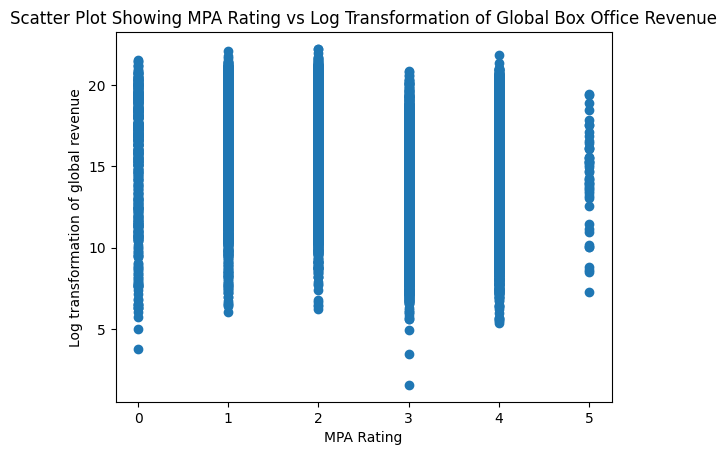

In [954]:
plt.scatter(df["mpa"], np.log1p(df["gross_worldwide"]))
plt.xlabel("MPA Rating")
plt.ylabel("Log transformation of global revenue")
plt.title("Scatter Plot Showing MPA Rating vs Log Transformation of Global Box Office Revenue")
plt.show()

This is a weak negative correlation so while there might be a slight lean towards films with a higher MPA rating getting less revenue, it is not significant enough to warrant creating a new feature.

Now, let's create the new features, starting with the number of words in the film's title. While it is quite unlikely that there will be any strong correlation there, it would be interesting to see if there is a pattern.

In [955]:
df["title_words"] = df["title"].str.count(' ') + 1
df["title_words"]

0        1
1        5
2        6
3        3
4        1
        ..
18217    5
18218    5
18219    6
18220    1
18221    5
Name: title_words, Length: 18222, dtype: int64

Let's check the correlation between the number of words in the title and worldwide revenue.

In [956]:
df["title_words"].corr(df["gross_worldwide"])

0.042735915549561895

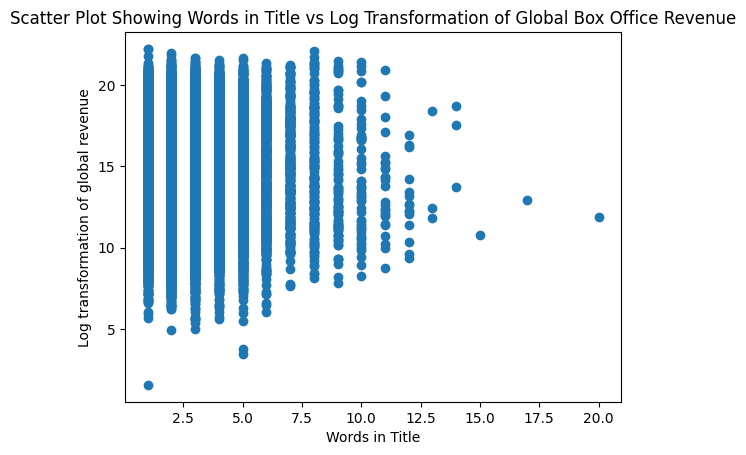

In [957]:
plt.scatter(df["title_words"], np.log1p(df["gross_worldwide"]))
plt.xlabel("Words in Title")
plt.ylabel("Log transformation of global revenue")
plt.title("Scatter Plot Showing Words in Title vs Log Transformation of Global Box Office Revenue")
plt.show()

That is a very weak correlation! Basically, there is no correlation between the number of words in a film's title and its global revenue. To improve the model's performance, we should drop this feature as it is not providing any useful information.

In [958]:
df = df.drop("title_words", axis = "columns")
df.columns.tolist()

['title',
 'year',
 'duration',
 'mpa',
 'rating',
 'votes',
 'budget',
 'gross_worldwide',
 'gross_us_canada',
 'opening_weekend_gross',
 'directors',
 'writers',
 'stars',
 'genres',
 'countries_origin',
 'production_companies',
 'languages']

A feature that ideally would be useful to include is a boolean value denoting whether the film is a sequel or not. Unfortunately, there is no concrete method of deciding whether a film is or isn't a sequel. We could look for instances of '2' or 'II', or maybe a colon for films such as 'Avatar: The Way of Water'. However, we then risk classing original films as sequels if they just happen to fall under one of these categories, as well as not counting films that are sequels but do not follow this format, such as 'The Dark Knight'.

The next step is to encode the text-based data. Neural networks can only deal with numerical data so we must encode all of the text that we want to use. We have already encoded MPA rating using ordinal encoding. The remaining columns with text-based data contain no ordinal data and are all lists. Before that, we will drop the title column. It will provide no information to the model so we shouldn't include it.

In [959]:
df = df.drop("title", axis = "columns")
df.columns.tolist()

['year',
 'duration',
 'mpa',
 'rating',
 'votes',
 'budget',
 'gross_worldwide',
 'gross_us_canada',
 'opening_weekend_gross',
 'directors',
 'writers',
 'stars',
 'genres',
 'countries_origin',
 'production_companies',
 'languages']

We need to convert the values to lists first.

In [960]:
df["directors"] = df["directors"].str.split(", ")
df["writers"] = df["writers"].str.split(", ")
df["stars"] = df["stars"].str.split(", ")
df["genres"] = df["genres"].str.split(", ")
df["countries_origin"] = df["countries_origin"].str.split(", ")
df["production_companies"] = df["production_companies"].str.split(", ")
df["languages"] = df["languages"].str.split(", ")

If we applied one-hot encoding, we would end up with far too many columns. We need to find a different way. That way is to find the mean global revenue of every film with that attribute and use that to represent it. However, if we just did that, the model would likely overfit the dataset a lot. To deal with this, we will only find the mean for attributes that appear a certain number of times. If the attribute doesn't reach that threshold, it will be represented by the global median of the dataset.

In some cases, people can be directors and writers, or directors and stars, sometimes on the same film, sometimes separately on different films. We could set directors, writers and stars as separate values, which would mean, for example, Paul Schrader the actor would be seen as different to Paul Schrader the director. Alternatively, we could merge the three columns to just count any credit on a film. This seems the better approach to avoid effectively splitting a person up into their different works, and wouldn't ignore any fame that they already have from a different type of work.

In [961]:
df["cast_crew"] = df.apply(lambda row: list(set(row["directors"] + row["writers"] + row["stars"])), axis = "columns")

First, we need to get the median global revenue and define the function to get the mean global revenue of the films with the eligible attributes.

In [962]:
median = df["gross_worldwide"].median()

def get_mean(attribute, column):
    df2 = df
    df2 = df2[df2[column].apply(lambda x: attribute in x)]
    return df2["gross_worldwide"].mean()

Then, we process each column, getting that attribute's mean if it meets the threshold and the global median otherwise.

In [963]:
cast_crew_counts = df["cast_crew"].explode().value_counts()
cast_crew_counts = cast_crew_counts[cast_crew_counts.index != "Unknown"]
cast_crew_list =  cast_crew_counts.index[cast_crew_counts >= 4]

means = {person: get_mean(person, "cast_crew") for person in cast_crew_list}
df["cast_crew"] = df["cast_crew"].apply(lambda x: [means[person] if person in cast_crew_list else median for person in x])
mean_list = df["cast_crew"].tolist()
df["cast_crew"] = [np.mean(x) for x in mean_list]

In [964]:
genres_counts = df["genres"].explode().value_counts()
genres_counts = genres_counts[genres_counts.index != "Unknown"]
genres_list = genres_counts.index[genres_counts >= 2]

means = {genre: get_mean(genre, "genres") for genre in genres_list}
df["genres"] = df["genres"].apply(lambda x: [means[genre] if genre in genres_list else median for genre in x])
mean_list = df["genres"].tolist()
df["genres"] = [np.mean(x) for x in mean_list]

In [965]:
countries_counts = df["countries_origin"].explode().value_counts()
countries_counts = countries_counts[countries_counts.index != "Unknown"]
countries_list = countries_counts.index[countries_counts >= 2]

means = {country: get_mean(country, "countries_origin") for country in countries_list}
df["countries_origin"] = df["countries_origin"].apply(lambda x: [means[country] if country in countries_list else median for country in x])
mean_list = df["countries_origin"].tolist()
df["countries_origin"] = [np.mean(x) for x in mean_list]

In [966]:
production_companies_counts = df["production_companies"].explode().value_counts()
production_companies_counts = production_companies_counts[production_companies_counts.index != "Unknown"]
production_companies_list = production_companies_counts.index[production_companies_counts >= 4]

means = {company: get_mean(company, "production_companies") for company in production_companies_list}
df["production_companies"] = df["production_companies"].apply(lambda x: [means[company] if company in production_companies_list else median for company in x])
mean_list = df["production_companies"].tolist()
df["production_companies"] = [np.mean(x) for x in mean_list]

In [967]:
languages_counts = df["languages"].explode().value_counts()
languages_counts = languages_counts[languages_counts.index != "Unknown"]
languages_list = languages_counts.index[languages_counts >= 2]

means = {language: get_mean(language, "languages") for language in languages_list}
df["languages"] = df["languages"].apply(lambda x: [means[language] if language in languages_list else median for language in x])
mean_list = df["languages"].tolist()
df["languages"] = [np.mean(x) for x in mean_list]

Then, we should drop the directors, writers and stars columns as they are no longer useful.

In [968]:
df = df.drop(["directors", "writers", "stars"], axis = "columns")
df.columns.tolist()

['year',
 'duration',
 'mpa',
 'rating',
 'votes',
 'budget',
 'gross_worldwide',
 'gross_us_canada',
 'opening_weekend_gross',
 'genres',
 'countries_origin',
 'production_companies',
 'languages',
 'cast_crew']

Now, all of the text has been encoded to be represented by numerical data. The final step before the data is ready is scaling the numerical data. Release year and rating do not need to be scaled as they are limited within a fairly small range. The other numerical columns will be scaled. 

StandardScaler was chosen over MinMaxScaler for two main reasons.
1. StandardScaler is less prone to outliers than MinMaxScaler and, due to the nature of the box office, there will likely be quite a few outliers in the dataset
2. StandardScaler keeps the scale of the data, which means it doesn't lose the scale by which a low-grossing film compares to a very high-grossing film

In [969]:
scaler = StandardScaler()
gross_worldwide_scaler = StandardScaler()
df["gross_worldwide"] = gross_worldwide_scaler.fit_transform(df[["gross_worldwide"]])

df[["duration", "votes", "budget", "gross_us_canada", "opening_weekend_gross", "genres", "countries_origin", "production_companies", "languages", "cast_crew"]] = scaler.fit_transform(df[["duration", "votes", "budget", "gross_us_canada", "opening_weekend_gross", "genres", "countries_origin", "production_companies", "languages", "cast_crew"]])
df

,year,duration,mpa,rating,votes,budget,gross_worldwide,gross_us_canada,opening_weekend_gross,genres,countries_origin,production_companies,languages,cast_crew
0,1975,0.826113,1.0,8.1,4.524691,-0.013328,14.480522,17.290914,1.784311,1.976783,0.425933,4.320811,-0.128705,6.219799
1,1975,-0.266755,4.0,7.4,0.875801,-0.027203,3.257671,7.111767,-0.356070,0.492565,0.361470,1.593286,-0.128705,-0.103338
2,1975,1.235938,4.0,8.7,7.508195,-0.022897,3.050148,6.852707,-0.356070,-0.195969,0.425933,-0.548179,-0.128705,0.481848
3,1975,0.871649,4.0,8.0,1.634198,-0.025768,1.214587,2.945904,-0.356070,-0.392156,0.425933,0.640429,-0.128705,0.200299
4,1975,0.188607,4.0,6.4,-0.254639,-0.020505,1.196111,2.906673,-0.356070,-0.418095,0.425933,0.083538,-0.128705,0.751746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18217,1988,-0.312291,3.0,7.2,-0.350512,-0.030074,-0.337941,-0.365998,-0.356070,0.350112,-1.790870,-0.574211,0.339501,-0.552388
18218,1988,-0.722116,3.0,6.9,-0.358282,-0.030074,-0.083266,-0.365998,-0.356070,1.514286,1.166661,-0.209562,0.274261,-0.101266
18219,1988,1.008257,3.0,7.1,-0.345504,-0.030074,-0.338004,-0.365998,-0.356070,-0.683906,-1.612593,-0.441079,0.073573,-0.617976
18220,1988,3.057384,3.0,6.4,-0.357173,-0.030074,-0.262727,-0.365998,-0.356070,-0.056157,-1.397445,-0.548179,-2.388254,-0.649122


## **<u>2. Training Process</u>**

First, we must split the data. For this, we will make use of the scikit-learn function that does this automatically. It also shuffles the data when splitting which is very useful as the films in the dataset are grouped by year so we would be avoiding several specific years if the data did not shuffle. The default split is 75-25. However, due to the size of the dataset, 80-20 seems like a better split as it provides the model with more training data, while also making sure there is enough testing data to test against.

In [970]:
X = df.drop("gross_worldwide", axis = "columns")
y = df["gross_worldwide"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #42 was chosen as it is the number used in the documentation found at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

We will be using PyTorch so we must convert the data into tensors. A tensor is essentially a data type that stores numerical data in an array of n dimensions. The data that we preprocessed is ready to be converted into tensors.

In [971]:
X_train_tensor = torch.tensor(X_train.values, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype = torch.float32).reshape(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype = torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float32).reshape(-1, 1)

If possible, we should use an accelerator to speed up the process. A GPU is significantly quicker than a CPU in situations like these.

In [972]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"

It is now time to create the model. We use ReLU as the activation function to help in noticing any non-linear relationships.

In [973]:
class BoxOfficeModel(torch.nn.Module):
    def __init__(self, num_features):
        super(BoxOfficeModel, self).__init__()

        hidden_1 = 32
        hidden_2 = 16

        self.model = torch.nn.Sequential(
            torch.nn.Linear(num_features, hidden_1),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_1, hidden_2),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_2, 1)
        )

    def forward(self, x):
        return self.model(x)

We can define the loss function. Mean Squared Error (MSE) was chosen as it is good at highlighting significant errors, as it squares them. In this task, we aren't going to be able to make truly accurate predictions every time but if we can minimise the number of significant errors, it will be a successful model.

In [974]:
loss_function = torch.nn.MSELoss()

Now, we can set up the training loop. It will take hyperparameters as arguments so that we can examine their effect easily later on. Further, it will return the results of the process so that they can be stored and analysed. It also keeps track of the lowest loss total across every epoch so that it can return the most successful result at the end. Results are returned as unscaled data to show the model's actual success with real-world values. Additionally, Mean Absolute Error (MAE) was chosen to show the success as it would show the genuine average distance away from the actual value.

Every 10 epochs, the error is outputted to keep us up to date with what is happening while it is running. Later on, the whole progression of the model will be shown on a graph.

Early stopping was considered as a way to enhance the model but ultimately was rejected. This was partly due to taking the best model at the end of the run, and partly due to the wish to examine the effect of increasing the number of epochs. The goal was to investigate whether it would be worth the extra computation time that extending the number of epochs would lead to.

In [975]:
#code used parts of code found at: https://machinelearningmastery.com/building-a-regression-model-in-pytorch/

def run_training(learning_rate, num_epochs, batch_size):

    optimiser = torch.optim.Adam(model.parameters(), lr = learning_rate)
    
    train_set = TensorDataset(X_train_tensor, y_train_tensor)
    train_dataset = DataLoader(train_set, batch_size = batch_size, shuffle = True)
    
    test_set = TensorDataset(X_test_tensor, y_test_tensor)
    test_dataset = DataLoader(test_set, batch_size = batch_size)
    
    best_mae = np.inf
    mae_results = []
    
    for epoch in range(num_epochs):
        model.train()
    
        #cycle through dataset in batches
        for features, targets in train_dataset:
            features = features.to(device)
            targets = targets.to(device)
    
            optimiser.zero_grad() #reset the gradients before processing the new batch
    
            results = model(features)
            loss = loss_function(results, targets)
    
            loss.backward()
            optimiser.step()
    
        model.eval()
        mae_error = 0
    
        for features, targets in test_dataset:
            features = features.to(device)
            targets = targets.to(device)
            
            results = model(features)
            
            results = results.cpu().detach().numpy()
            targets = targets.cpu().detach().numpy()

            real_results = gross_worldwide_scaler.inverse_transform(results)
            real_targets = gross_worldwide_scaler.inverse_transform(targets)

            mae_error += mean_absolute_error(real_results, real_targets)

        mae_error /= len(test_dataset)
        mae_results.append(mae_error)
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}: Mean Absolute Error: {mae_error:.2f}")
    
        if mae_error < best_mae:
            best_mae = mae_error

    print()
    return best_mae, mae_results

## **<u>3. Results</u>**

We will test the effects of the hyperparameters one at a time. Later, we will use our results to guide our selection of the best combination of hyperparameters. First, let's declare each array of hyperparameters that will be used across the entire results process.

In [976]:
lr = [0.0001, 0.0005, 0.001, 0.005, 0.01]
epochs = [50, 100, 200]
bsize = [16, 32, 64, 128]

Then, when testing one hyperparameter, the others will remain the same so that the variable hyperparameter will be the only thing changing. This allows us to analyse the effect of one hyperparameter in particular.

The first one we will analyse will be learning rate. For each learning rate, we will see the progression of the error across the duration of the epochs, and plot the results on a graph to be compared. In addition, the lowest error will be saved in the dataframe, which will be outputted at the end of each hyperparameter analysis. The other hyperparameters are set to the middle value of their respective arrays.

Model with learning rate: 0.0001
Epoch 10: Mean Absolute Error: 74694903.51
Epoch 20: Mean Absolute Error: 43840776.14
Epoch 30: Mean Absolute Error: 44177880.89
Epoch 40: Mean Absolute Error: 43992226.54
Epoch 50: Mean Absolute Error: 39167882.28
Epoch 60: Mean Absolute Error: 36157178.04
Epoch 70: Mean Absolute Error: 48731747.35
Epoch 80: Mean Absolute Error: 35511344.16
Epoch 90: Mean Absolute Error: 33350378.32
Epoch 100: Mean Absolute Error: 39893796.75

Model with learning rate: 0.0005
Epoch 10: Mean Absolute Error: 33930588.79
Epoch 20: Mean Absolute Error: 31119810.17
Epoch 30: Mean Absolute Error: 31026555.35
Epoch 40: Mean Absolute Error: 38973658.19
Epoch 50: Mean Absolute Error: 32666891.91
Epoch 60: Mean Absolute Error: 58201400.77
Epoch 70: Mean Absolute Error: 86490026.95
Epoch 80: Mean Absolute Error: 36721661.21
Epoch 90: Mean Absolute Error: 54148009.02
Epoch 100: Mean Absolute Error: 32363294.36

Model with learning rate: 0.001
Epoch 10: Mean Absolute Error: 3652477

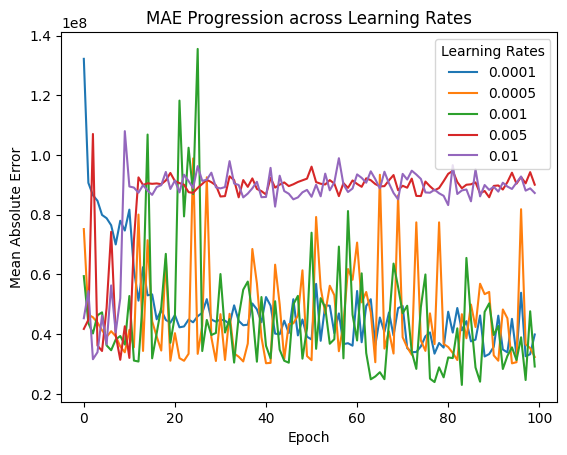

,learning_rate,num_epochs,batch_size,best_mae
0,0.0001,100,32,3.253645e+07
1,0.0005,100,32,3.023348e+07
2,0.0010,100,32,2.301094e+07
3,0.0050,100,32,3.142778e+07
4,0.0100,100,32,3.161122e+07


In [977]:
lr_results = pd.DataFrame(columns = ["learning_rate", "num_epochs", "batch_size", "best_mae"])

all_mae_results = []

epoch = epochs[1] 
batch = bsize[1]

for rate in lr:
    print(f"Model with learning rate: {rate}")
    model = BoxOfficeModel(X_train_tensor.shape[1]).to(device) #set or reset the model
    best_mae, mae_results = run_training(rate, epoch, batch)
    lr_results.loc[len(lr_results)] = {"learning_rate": rate, "num_epochs": epoch, "batch_size": batch, "best_mae": best_mae}
    all_mae_results.append(mae_results)

for i, mae_results in enumerate(all_mae_results):
    plt.plot(mae_results, label = {lr[i]})

plt.title("MAE Progression across Learning Rates")
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.legend(title = "Learning Rates")
plt.show()

lr_results

Now let's analyse how changing the number of epochs affects the model. We will use the most successful learning rate from above, which is 0.001. When selecting the most successful, it is important to not solely use the lowest error, but also analyse the trend of the data and judge the likelihood that the low error was a fluke. In this case, although the learning rate of 0.001 can be a bit more volatile than 0.0001, its success overall, with several occurrences of errors lower than the other lowest, makes it clearly the optimal learning rate.

Model with 50 total epochs
Epoch 10: Mean Absolute Error: 43372803.98
Epoch 20: Mean Absolute Error: 49989822.88
Epoch 30: Mean Absolute Error: 38138760.28
Epoch 40: Mean Absolute Error: 67125244.39
Epoch 50: Mean Absolute Error: 42321567.12

Model with 100 total epochs
Epoch 10: Mean Absolute Error: 44988592.51
Epoch 20: Mean Absolute Error: 63050800.53
Epoch 30: Mean Absolute Error: 59030491.40
Epoch 40: Mean Absolute Error: 37996726.39
Epoch 50: Mean Absolute Error: 52055182.56
Epoch 60: Mean Absolute Error: 60320898.11
Epoch 70: Mean Absolute Error: 36026318.28
Epoch 80: Mean Absolute Error: 50090028.35
Epoch 90: Mean Absolute Error: 26467850.74
Epoch 100: Mean Absolute Error: 27530473.01

Model with 200 total epochs
Epoch 10: Mean Absolute Error: 92780132.00
Epoch 20: Mean Absolute Error: 93289510.04
Epoch 30: Mean Absolute Error: 90749886.60
Epoch 40: Mean Absolute Error: 29676954.12
Epoch 50: Mean Absolute Error: 58268252.07
Epoch 60: Mean Absolute Error: 22224559.21
Epoch 70: M

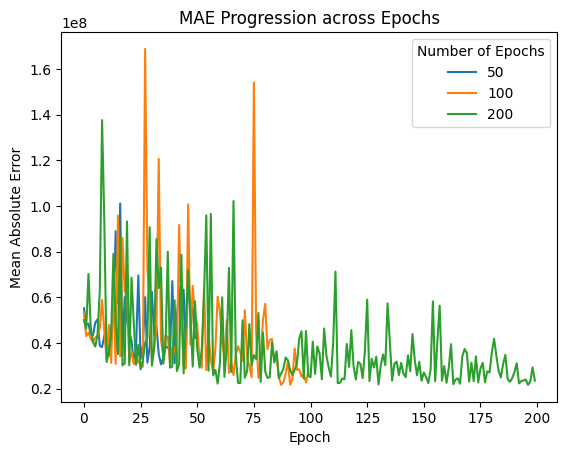

,learning_rate,num_epochs,batch_size,best_mae
0,0.001,50,32,3.067009e+07
1,0.001,100,32,2.166818e+07
2,0.001,200,32,2.167291e+07


In [978]:
epoch_results = pd.DataFrame(columns = ["learning_rate", "num_epochs", "batch_size", "best_mae"])

all_mae_results = []

rate = lr[2] #set to most successful
batch = bsize[1]

for epoch in epochs:
    print(f"Model with {epoch} total epochs")
    model = BoxOfficeModel(X_train_tensor.shape[1]).to(device) #set or reset the model
    best_mae, mae_results = run_training(rate, epoch, batch)
    epoch_results.loc[len(epoch_results)] = {"learning_rate": rate, "num_epochs": epoch, "batch_size": batch, "best_mae": best_mae}
    all_mae_results.append(mae_results)

for i, mae_results in enumerate(all_mae_results):
    plt.plot(mae_results, label = {epochs[i]})

plt.title("MAE Progression across Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.legend(title = "Number of Epochs")
plt.show()

epoch_results

Finally, we look at the effects of different batch sizes. Now, we will use the most successful learning rate and number of epochs to test. In this case, the extra computation time of the extra 100 epochs after the first 100 doesn't seem justified, as they have very similar lowest errors and it doesn't seem like the continued running of the model is causing any real improvement. Thus, we will call 100 the most successful number of epochs. 

Now, testing the batch sizes next to these most successful hyperparameters will give us a reasonable optimal model.

Model with batch size: 16
Epoch 10: Mean Absolute Error: 28956171.64
Epoch 20: Mean Absolute Error: 28867378.23
Epoch 30: Mean Absolute Error: 53904666.25
Epoch 40: Mean Absolute Error: 23728562.42
Epoch 50: Mean Absolute Error: 49718989.20
Epoch 60: Mean Absolute Error: 25156117.87
Epoch 70: Mean Absolute Error: 28395332.72
Epoch 80: Mean Absolute Error: 28045492.93
Epoch 90: Mean Absolute Error: 33611678.74
Epoch 100: Mean Absolute Error: 28585143.91

Model with batch size: 32
Epoch 10: Mean Absolute Error: 82271296.42
Epoch 20: Mean Absolute Error: 57285802.07
Epoch 30: Mean Absolute Error: 68902449.26
Epoch 40: Mean Absolute Error: 39595239.56
Epoch 50: Mean Absolute Error: 29546798.23
Epoch 60: Mean Absolute Error: 35276131.37
Epoch 70: Mean Absolute Error: 34635701.51
Epoch 80: Mean Absolute Error: 38823122.04
Epoch 90: Mean Absolute Error: 31458888.35
Epoch 100: Mean Absolute Error: 42141455.00

Model with batch size: 64
Epoch 10: Mean Absolute Error: 40593294.18
Epoch 20: Mean 

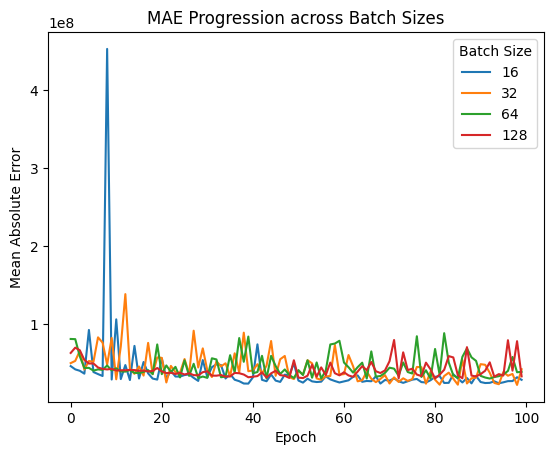

,learning_rate,num_epochs,batch_size,best_mae
0,0.001,100,16,2.372856e+07
1,0.001,100,32,2.203589e+07
2,0.001,100,64,3.022678e+07
3,0.001,100,128,3.030778e+07


In [979]:
batch_results = pd.DataFrame(columns = ["learning_rate", "num_epochs", "batch_size", "best_mae"])

all_mae_results = []

rate = lr[2]
epoch = epochs[1]

for batch in bsize:
    print(f"Model with batch size: {batch}")
    model = BoxOfficeModel(X_train_tensor.shape[1]).to(device) #set or reset the model
    best_mae, mae_results = run_training(rate, epoch, batch)
    batch_results.loc[len(batch_results)] = {"learning_rate": rate, "num_epochs": epoch, "batch_size": batch, "best_mae": best_mae}
    all_mae_results.append(mae_results)

for i, mae_results in enumerate(all_mae_results):
    plt.plot(mae_results, label = {bsize[i]})

plt.title("MAE Progression across Batch Sizes")
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.legend(title = "Batch Size")
plt.show()

batch_results

It looks quite close between 16 and 32, especially later on. It would take more tests to find a definitive answer. Interestingly, the lowest error across the hyperparameter tests came in the epoch test, where it was around 21.6 million. With more time and computational power, it is likely that this could be reduced a small amount but ultimately not enough to justify it. Therefore, we will take 21.6 million as our final result.

So what does that actually mean? Well let's look at the mean and standard deviation of the revenues.

In [992]:
gross_worldwide_scaler.inverse_transform(df["gross_worldwide"].mean().reshape(-1, 1)).tolist()[0][0]

63484214.172986545

In [993]:
gross_worldwide_scaler.inverse_transform(df["gross_worldwide"].std().reshape(-1, 1)).tolist()[0][0]

251260377.4854476

Our Mean Absolute Error is around 34% of the mean. Initially, that seems quite high. The standard deviation of the revenues, however, is 25.1 million. First of all, it shows the high level of variance in the data. Of course, this is to be expected as we used a dataset that covered a wide range of revenues, and the box office isn't known for its stability and predictability. Secondly, the Mean Absolute Error is lower than the standard deviation, which means the model's predictions are close enough to the real values to be considered at least partly successful.

For this model, there is a limit to how much we can read from using an error calculation. For example, using the Mean Absolute Error gives us an overall average of how far away the predictions were from the real values. However, it ignores the fact that predicting £650,000,000 for a £750,000,000 film is not the same as predicting £100 million for a film that makes no money at all, despite appearing to be the same as they are both 100 million away. Similarly, if we used a relative error by percentage, it would then be skewed against lower-grossing films. For example, if a film earned £1,000,000 and was predicted £600,000, that would be a successful prediction despite being 40% away. This means that neither absolute nor relative errors can give us a true idea of how successful the model is.

Overall, I am relatively happy with the model. Of course, there is room for improvement, from a more informative and complete dataset to better hyperparameter tuning, but considering the unpredictability of box office revenue, especially when reduced down to metadata, I think the model is a mild success.

## **<u>4. Analysis of Similar Online Tutorials</u>**

**Tutorial 1- Box Office Revenue Prediction Using Linear Regression in ML**

This tutorial (ap853uk5h, 2024) is much more brief in the preprocessing stage. It appears to use a more complete dataset that didn't need to be changed much before use in the model. In fact, the whole tutorial is much more brief. It doesn't seem to explain much and doesn't critically evaluate or justify any of the choices made. In my tutorial, I made sure to explain the choices that I made and explain how some things worked that weren't immediately obvious. ap853uk5h's tutorial essentially just returned the final results, giving no explanation of what they meant, how they related to the real-world values, or how successful the model was. However, ap853uk5h's tutorial evaluates the correlation between all of the features and the target variable, whereas my tutorial only explores some.

In terms of the approaches, there were some oversights in both tutorials. My tutorial missed some features that would have been useful, as mentioned earlier. ap853uk5h's tutorial had fewer features, most of which were directly related to the film's box office status, rather than the film itself, overlooking cast, crew and country of origin. Their tutorial used XGBoost Regression for the model, which typically requires more feature engineering, in contrast with my choice of using a neural network, which is better at recognising patterns itself and doesn't require as much analysis of the features.

**Tutorial 2- How to use Machine Learning Approach to Predict Movie Box-Office Revenue / Success?**

This tutorial (Adhikari, 2020) makes use of a lot of graphs to analyse the relationships between features and also between a feature and the target variable. It does this more effectively than my tutorial. However, this tutorial did not make use of neural networks, so more feature engineering and analysis was required. Adhikari tested multiple types of machine learning model, employing linear regression, random forest and gradient boost regression.

Some of the choices made by Adhikari are questionable. For example, including all non-english films as one genre feels both disingenuous and inaccurate. Further, displaying the results as a graph that portrays all genres as separate and the same type of attribute as duration oversimplifies the complexity of a film. Once again, cast and crew were completely overlooked as a feature. However, Adhikari's tutorial used both release month and release day, which is something my dataset lacked.

Adhikari also made strong use of graphs to justify or further their explanations, such as providing a histogram of revenue before and after log transformation. This is something that I perhaps could have utilised more. The explanations in Adhikari's tutorial decline a little in depth and quality once the training process begins, not detailing what the different models do well or badly, or why they were chosen.

**Tutorial 3- What makes a successful film? Predicting a film's revenue and user rating with machine learning**

This tutorial (Anderson, 2019) used very similar features to the ones in my tutorial, including cast and crew as well as production companies. The discussion of preprocessing is quite brief. For example, Anderson mentioned adjusting the dataset for inflation but didn't give any explanation of how or show any visual analysis. In my tutorial, I ensured that all of my actions were clear and explained well in both the justification and the action itself.

It appears that Anderson may have used one hot encoding, as they seem to have used around 1200 input variables. This was something I particularly wanted to avoid as it can easily cause overfitting. Anderson mentioned that a lot didn't have an impact so next time would address that before processing the model. This is similar to my approach of setting a minimum limit for the number of occurrences of a categorical value, which seems to have worked well.

Anderson did a good job of being analytical and explaining their successes and failures, which I could have perhaps done better.

## **<u>5. References</u>**

Addala, R. (2025) *30,000+ Movies, 60+ Years of Data, Rich Metadata*. Kaggle. Available at: https://www.kaggle.com/datasets/raedaddala/top-500-600-movies-of-each-year-from-1960-to-2024. (Accessed: 2 March 2025)

Adhikari, S. (2020) *How to use Machine Learning Approach to Predict Movie Box-Office Revenue / Success?*. Medium. Available at: https://medium.com/analytics-vidhya/how-to-use-machine-learning-approach-to-predict-movie-box-office-revenue-success-e2e688669972. (Accessed: 16 March 2025)

Anderson, R. (2019) *What makes a successful film? Predicting a film’s revenue and user rating with machine learning*. Medium. Available at: https://ryan-anderson-ds.medium.com/what-makes-a-successful-film-predicting-a-films-revenue-and-user-rating-with-machine-learning-e2d1b42365e7. (Accessed: 16 March 2025)

ap853uk5h (2024) *Box Office Revenue Prediction Using Linear Regression in ML*. Geeks for Geeks. Available at: https://www.geeksforgeeks.org/box-office-revenue-prediction-using-linear-regression-in-ml. (Accessed: 16 March 2025)

U.S. Bureau of Labor Statistics (2025) *Historical CPI-U, January 2025*. Available at: https://www.bls.gov/cpi/tables/supplemental-files/historical-cpi-u-202501.xlsx. (Accessed: 9 March 2025)